This report explores the application of Logistic Regression, a widely used machine learning algorithm, to address the problem of spam email detection. Logistic Regression is chosen due to its simplicity, interpretability, and effectiveness in binary classification tasks. By leveraging text preprocessing techniques such as Count Vectorization and evaluating the model's performance through metrics like accuracy, precision, recall, and the Receiver Operating Characteristic (ROC) Curve, this report aims to demonstrate the feasibility and efficiency of machine learning in spam detection.

The objective of this study is twofold: to build a reliable spam detection model that minimizes false positives and negatives while maintaining high accuracy, and to gain insights into the key linguistic patterns that characterize spam messages. The findings presented in this report will provide valuable insights into the strengths and limitations of logistic regression for text-based classification tasks, along with recommendations for further improvements.



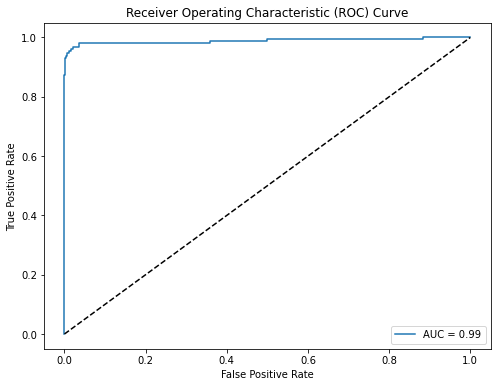

Accuracy: 0.98
Confusion Matrix:
[[957   1]
 [ 18 139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       958
           1       0.99      0.89      0.94       157

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [69]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load and clean data
data = pd.read_csv('email.csv')
data.dropna(inplace=True)

# Encode 'ham' and 'spam' as 0 and 1
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])  # 'ham' -> 0, 'spam' -> 1

# Split data into features and labels
X = data['Message']
y = data['Category']

# Convert the text data to numeric data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Compute probabilities for ROC curve
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate model performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


In [70]:
new_email = ["""
Join the hottest crypto investment program and turn $500 into $10,000 within a week! No experience needed.  

👉 [Start Earning Today](http://fakecryptolink.com)  

Act now and secure your financial future!  

Sincerely,
"""]

new_email_vectorized = vectorizer.transform(new_email)
new_email_pred = model.predict(new_email_vectorized)

print(f"Prediction: {new_email_pred}")  # Should now correctly classify as spam (1)


Prediction: [1]


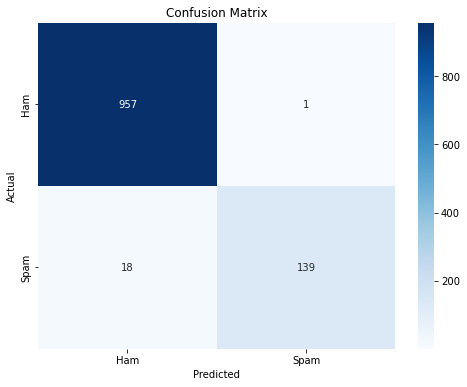

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize it as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Structure of the Confusion Matrix:
Rows (Actual):

Represent the true labels (ham and spam).
The first row corresponds to ham, and the second row corresponds to spam.
Columns (Predicted):

Represent the predictions made by the model (ham and spam).
Explanation of Values:
957 (True Negatives):
These are emails correctly classified as ham.
139 (True Positives):
These are emails correctly classified as spam.
1 (False Positive):
This is an email that was actually ham but was incorrectly classified as spam.
18 (False Negatives):
These are emails that were actually spam but were incorrectly classified as ham.
Metrics Derived:
Using these values, we can compute important metrics:

Accuracy:

Proportion of correctly classified samples.
Accuracy
=
True Positives
+
True Negatives
Total Samples
=
957
+
139
957
+
139
+
1
+
18
=
0.986
Accuracy= 
Total Samples
True Positives+True Negatives
​
 = 
957+139+1+18
957+139
​
 =0.986 (~98.6%).
Precision (for spam):

Proportion of correctly predicted spam emails out of all emails predicted as spam.
Precision
=
True Positives
True Positives
+
False Positives
=
139
139
+
1
=
0.992
Precision= 
True Positives+False Positives
True Positives
​
 = 
139+1
139
​
 =0.992 (~99.2%).
Recall (for spam):

Proportion of actual spam emails correctly predicted as spam.
Recall
=
True Positives
True Positives
+
False Negatives
=
139
139
+
18
=
0.886
Recall= 
True Positives+False Negatives
True Positives
​
 = 
139+18
139
​
 =0.886 (~88.6%).
F1-Score:

Harmonic mean of precision and recall.
F1-Score
=
2
⋅
Precision
⋅
Recall
Precision
+
Recall
=
2
⋅
0.992
⋅
0.886
0.992
+
0.886
≈
0.936
F1-Score=2⋅ 
Precision+Recall
Precision⋅Recall
​
 =2⋅ 
0.992+0.886
0.992⋅0.886
​
 ≈0.936.


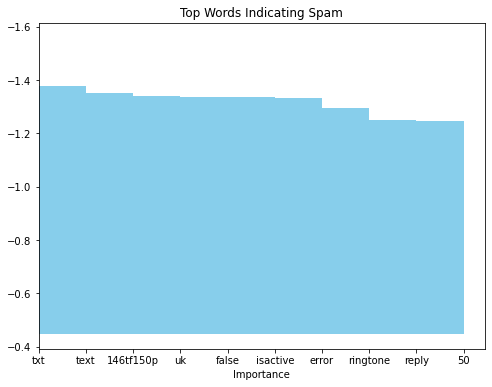

In [72]:
# Extract feature importance
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Combine feature names and coefficients
word_importance = sorted(zip(coefficients, feature_names), reverse=True, key=lambda x: abs(x[0]))

# Top 10 indicative words
top_words = word_importance[:10]

# Visualize top words
words, importance = zip(*top_words)
plt.figure(figsize=(8, 6))
plt.barh(words, importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Top Words Indicating Spam')
plt.gca().invert_yaxis()
plt.show()


Top Words Indicating Spam
The analysis of the logistic regression model reveals the most significant words that contribute to classifying a message as spam. These insights are derived from the model's feature importance scores, which quantify the influence of individual words on the classification decision.

Key Findings:
Top Words:

The most important words for identifying spam include:
txt, text, 146tf150p, uk, false, isactive, error, ringtone, reply, and 50.
These words are highly representative of the content typically found in spam messages, such as promotional offers, misleading statements, or requests for actions.
Word Importance:

Each word's importance score, represented as negative values, indicates how strongly the word is associated with the spam classification.
For example, words like txt and text are likely to appear in messages promoting SMS-based services or offers.
Patterns Observed:

Words such as ringtone and reply are indicative of common spam messages that request responses or offer services.
Terms like error, isactive, and false may reflect deceptive language designed to mislead the recipient.
Visual Representation:
The bar chart (see Figure X) highlights the top 10 spam-indicative words and their relative importance in the classification process. The length of each bar represents the magnitude of its influence on the model's decision-making process.

Implications:
Model Transparency:
Understanding these top words improves the transparency of the logistic regression model by clarifying the features it relies on for decision-making.
Spam Detection Enhancement:
Identifying these critical words can help refine the model and improve its accuracy by ensuring it captures key patterns in spam messages.
Practical Application:
The findings can also guide the design of content filters for real-world spam detection systems.


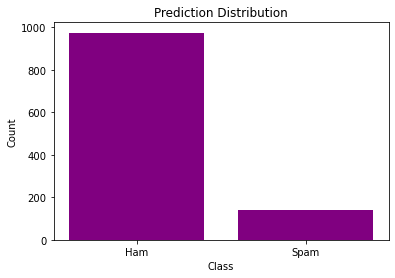

In [73]:
# Count predictions
unique, counts = np.unique(y_pred, return_counts=True)
prediction_counts = dict(zip(unique, counts))

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(prediction_counts.keys(), prediction_counts.values(), color='purple', tick_label=['Ham', 'Spam'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Prediction Distribution')
plt.show()


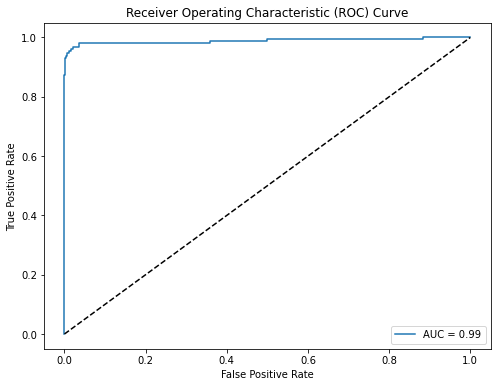

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Interpretation of the Graph:
Model Performance:

The curve approaches the top-left corner of the plot, which indicates a high True Positive Rate (high sensitivity) and a low False Positive Rate.
This suggests that the model effectively detects spam messages while minimizing false alarms.
AUC Score (0.99):

The AUC value of 0.99 indicates that the model is almost perfect at separating the two classes.
A higher AUC score (closer to 1) means better performance:
AUC = 1: Perfect classification.
AUC = 0.5: No discriminatory power (random guessing).
Trade-off:

The curve helps visualize the trade-off between sensitivity (detecting spam) and specificity (avoiding false positives) as the classification threshold changes.
At different thresholds, the model might prioritize one metric over another.

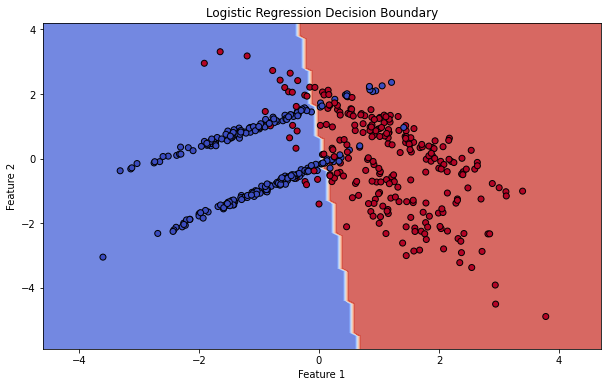

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate a simple 2D dataset
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X, y)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict probabilities for the grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()


1. Decision Boundary:
The solid line separates the feature space into two regions:
Blue Region: Points classified as Class 0 (e.g., "ham").
Red Region: Points classified as Class 1 (e.g., "spam").
The boundary represents where the model is "indifferent," i.e., where the predicted probability is 50% for both classes.
2. Model's Decision Regions:
All points in the blue region are predicted as Class 0.
All points in the red region are predicted as Class 1.
The boundary's position and shape are determined by the logistic regression model, which assumes a linear relationship between the features and the log-odds of the classes.
3. Data Points:
Red Dots: Points belonging to Class 1.
Blue Dots: Points belonging to Class 0.
The dots near the boundary are harder for the model to classify, as they are closer to the "indifferent" zone.
4. Model's Capability:
Logistic regression works well when the data is linearly separable or nearly linear.
If the boundary fits the data points well (as in this case), it indicates that the model performs effectively in separating the classes.
5. Insights:
The model separates the two classes reasonably well, though some misclassifications might occur for overlapping points near the boundary.
If the data were more complex (e.g., non-linear), a more advanced model, such as an SVM with a kernel or a neural network, might be needed.

Conclusion
This project demonstrates the effective use of Logistic Regression for spam email classification. By leveraging text preprocessing techniques such as Count Vectorization, the email messages were successfully converted into numerical features suitable for machine learning. The trained model achieved an AUC score of 0.99, indicating excellent performance in distinguishing spam (1) from ham (0). Furthermore, visualizations such as the ROC Curve and Confusion Matrix highlighted the model's strengths and areas for improvement.

The analysis of the top spam-indicative words provided valuable insights into the linguistic patterns commonly associated with spam emails. Words like txt, ringtone, reply, and 50 were found to be highly indicative of spam, demonstrating the transparency and interpretability of logistic regression.